# What is DBSCAN?

## Introduction  
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful density-based clustering algorithm that identifies groups of closely packed data points. It treats data points in sparse regions as noise and separates clusters based on density differences in the feature space. Unlike K-Means or hierarchical clustering—which assume clusters are spherical or compact—DBSCAN can detect clusters of arbitrary shapes and is highly effective in handling noise and outliers.

One of DBSCAN’s strengths is that it does not require the number of clusters to be specified in advance. This makes it especially useful in real-world applications where the underlying cluster structure is unknown or irregular.


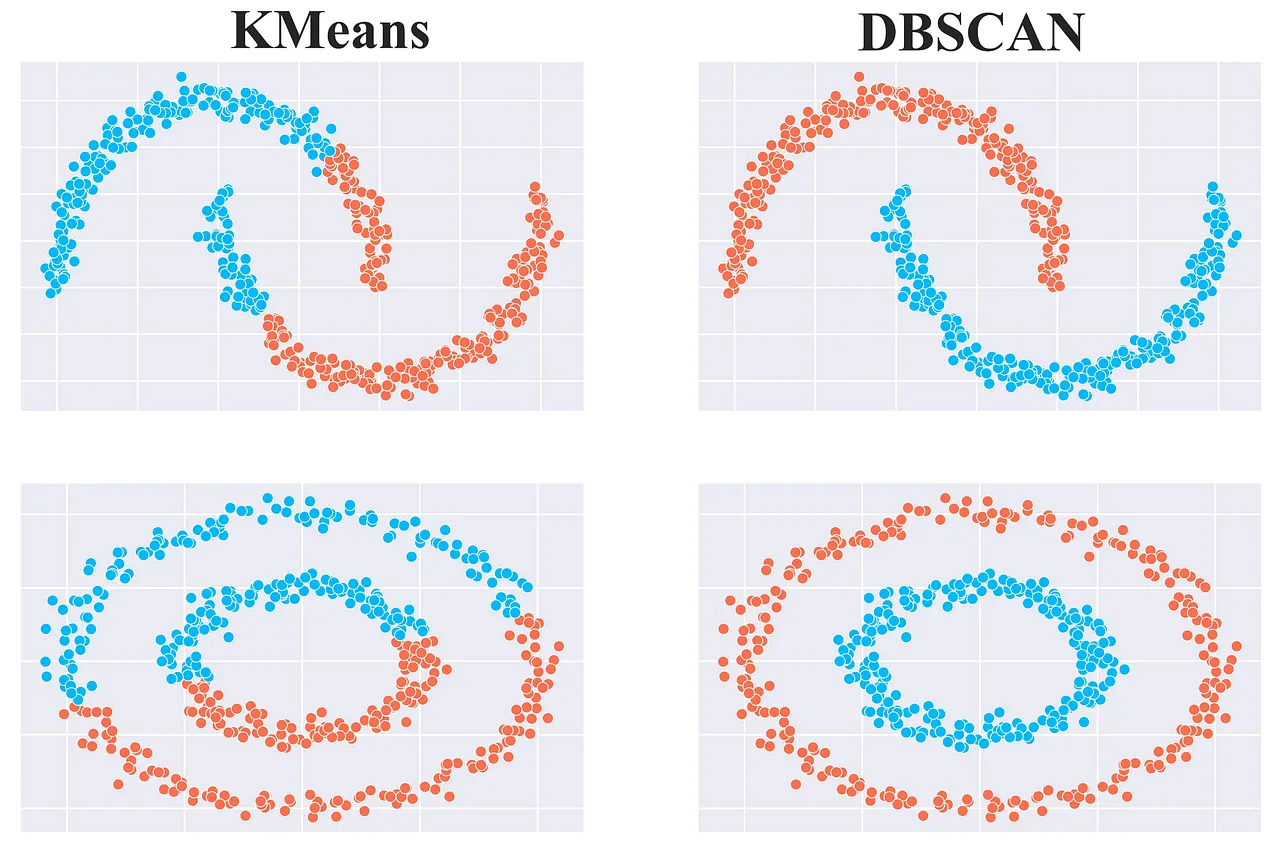

## Parameters for the Model  
DBSCAN relies on two key parameters that significantly impact its performance:

- **`eps` (Epsilon)**:  
  This parameter defines the radius of a neighborhood around a data point. Two points are considered neighbors if their distance is less than or equal to `eps`. Choosing the right value is important:
  - If `eps` is too small, many points will be labeled as noise.
  - If `eps` is too large, distinct clusters may merge.
  
  A common approach to selecting `eps` is to analyze a *k-distance graph*, which helps find a natural elbow point indicating a shift in density.

- **`MinPts` (Minimum Points)**:  
  This is the minimum number of data points required within an `eps` neighborhood for a region to be considered dense. A typical heuristic is to set `MinPts` to at least `D + 1`, where `D` is the number of dimensions in the dataset. In most practical cases, a value of at least 3 is recommended.

Careful tuning of these parameters is essential to achieving useful clustering results.



## How Does DBSCAN Work?  
DBSCAN classifies data points into three categories:

- **Core Points**:  
  These points have at least `MinPts` neighbors within their `eps` radius. They form the core of a cluster.

- **Border Points**:  
  These lie within the `eps` radius of a core point but do not have enough neighbors to be considered core points themselves. They are assigned to a cluster but do not help it grow.

- **Noise Points**:  
  These do not belong to any cluster and have too few neighbors to qualify as core or border points. DBSCAN treats these as outliers and excludes them from all clusters.

The algorithm begins by selecting an unvisited point. If it is a core point, DBSCAN forms a new cluster and recursively adds all density-reachable points. This process continues until no more points can be added to the current cluster. Then, the algorithm moves on to the next unvisited point and repeats the process.

The final output includes clusters of varying shapes and densities, along with a set of noise points that do not fit any pattern.

By relying on local density instead of global distance assumptions, DBSCAN provides a flexible and intuitive approach to clustering, particularly well-suited for complex, noisy datasets.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)

df = df.drop(columns=['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_balanced)

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

print("Cluster Labels Found:", set(db_labels))

df_results = pd.DataFrame({'TrueLabel': y_train_balanced, 'ClusterLabel': db_labels})
print("\nCross-tab between true labels and DBSCAN clusters:")
print(pd.crosstab(df_results['TrueLabel'], df_results['ClusterLabel']))

# DBSCAN Graph

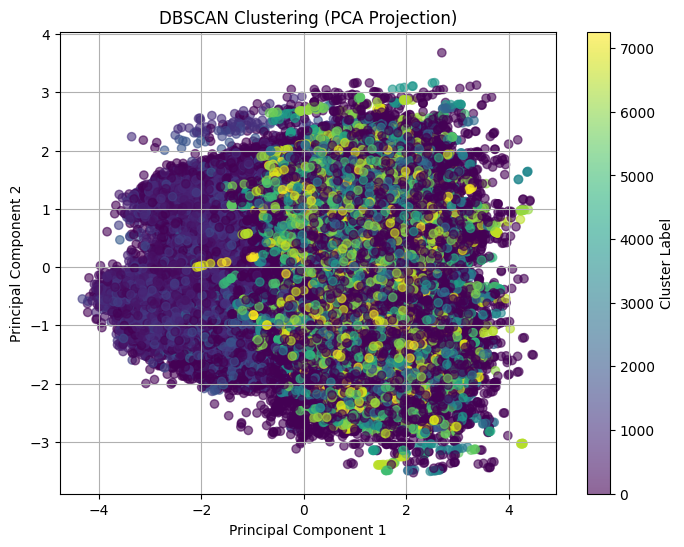

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

This chart displays the clusters identified by the algorithm within the dataset.

Each colored dot represents an individual, with people grouped by color based on similarities in their data. Dots in darker or different colors represent individuals who didn't fit well into any cluster—these are considered "noise."

The algorithm detected a large, central cluster that includes both individuals with and without diabetes. Additionally, a significant number of data points were labeled as noise, indicating that, under the current settings, the algorithm did not clearly distinguish between diabetic and non-diabetic individuals.